In [1]:
import os
import numpy as np
from PIL import Image


In [3]:
train_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Training_Set'
validation_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Validation_Set'
test_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Test_Set'


In [5]:
def load_image(img_path):
    try:
        img = Image.open(img_path)  # Open the image
        img = img.convert('RGB')  # Ensure image is in RGB mode
        img = img.resize((224, 224))  # Resize to (224, 224)
        img_array = np.array(img)  # Convert to numpy array
        return img_array
    except Exception as e:
        print(f"Could not load image {img_path}: {e}")
        return None

def load_images_from_folder_with_labels(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        if not os.path.isdir(subfolder_path) or subfolder.startswith('.'):
            continue
        for filename in os.listdir(subfolder_path):
            if filename.startswith('.'):
                continue
            img_path = os.path.join(subfolder_path, filename)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                img_array = load_image(img_path)
                if img_array is not None:
                    images.append(img_array)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load images from training, validation, and test sets
train_images, train_labels = load_images_from_folder_with_labels(train_path)
validation_images, validation_labels = load_images_from_folder_with_labels(validation_path)
test_images, test_labels = load_images_from_folder_with_labels(test_path)

# Print shapes of images
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (4200, 224, 224, 3)
Train labels shape: (4200,)
Validation images shape: (1200, 224, 224, 3)
Validation labels shape: (1200,)
Test images shape: (600, 224, 224, 3)
Test labels shape: (600,)


In [6]:
import numpy as np
from keras.utils import to_categorical

# Check for unique labels before adjusting
print("Unique labels in train_labels before adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels before adjustment:", np.unique(validation_labels))

# Subtract 1 from all labels to shift the range to [0, 5]
train_labels = train_labels - 1
validation_labels = validation_labels - 1

# Now check if the labels are in the valid range [0, 5]
print("Unique labels in train_labels after adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels after adjustment:", np.unique(validation_labels))

# Apply one-hot encoding to the adjusted labels
train_labels = to_categorical(train_labels, num_classes=6)
validation_labels = to_categorical(validation_labels, num_classes=6)

# Check the shapes of the one-hot encoded labels
print("Train labels shape after one-hot encoding:", train_labels.shape)
print("Validation labels shape after one-hot encoding:", validation_labels.shape)

# Check the unique values in the one-hot encoded labels by checking the unique rows
unique_train_labels = np.unique(train_labels, axis=0)
unique_validation_labels = np.unique(validation_labels, axis=0)

print("Unique labels in train_labels after one-hot encoding:", unique_train_labels)
print("Unique labels in validation_labels after one-hot encoding:", unique_validation_labels)


Unique labels in train_labels before adjustment: [1 2 3 4 5 6]
Unique labels in validation_labels before adjustment: [1 2 3 4 5 6]
Unique labels in train_labels after adjustment: [0 1 2 3 4 5]
Unique labels in validation_labels after adjustment: [0 1 2 3 4 5]
Train labels shape after one-hot encoding: (4200, 6)
Validation labels shape after one-hot encoding: (1200, 6)
Unique labels in train_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Unique labels in validation_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


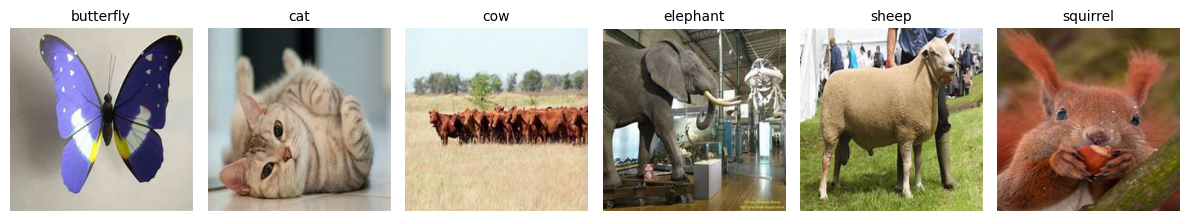

In [7]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
%matplotlib inline

import numpy as np  # Ensure NumPy is imported

def show_one_image_per_class(images, labels, num_classes, class_names):
    # Dictionary to store one image per class
    class_images = {}

    # Loop over images and labels
    for img, label in zip(images, labels):
        # Extract the label index from the one-hot encoded label
        label_index = np.argmax(label)  # Get the index of the '1' in the one-hot encoding

        # Add the first image for each class
        if label_index not in class_images:
            class_images[label_index] = img
        if len(class_images) == num_classes:
            break

    # Display images
    plt.figure(figsize=(12, 6))
    for i, class_label in enumerate(sorted(class_images.keys())):
        plt.subplot(1, num_classes, i + 1)  # Use `i + 1` for the subplot index
        plt.imshow(class_images[class_label])
        plt.title(class_names[class_label], fontsize=10)  # Use label directly for class_names
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 6 classes in your dataset with these names
class_names = ["butterfly", "cat", "cow", "elephant", "sheep", "squirrel"]

# Show one image for each class in the training set
NUM_CLASSES = 6
show_one_image_per_class(train_images, train_labels, NUM_CLASSES, class_names)


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
def normalize_images(images):
    return images / 255.0  # Normalize pixel values to [0, 1]

In [10]:
train_images_normalized = normalize_images(train_images)
validation_images_normalized = normalize_images(validation_images)
test_images_normalized = normalize_images(test_images)

In [11]:
def get_class_counts(data_dir):
    class_counts = {}
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts


In [12]:
train_class_counts = get_class_counts(train_path)
validation_class_counts = get_class_counts(validation_path)

In [13]:
print("Train class counts:", train_class_counts)
print("Validation class counts:", validation_class_counts)
print("Class names:", class_names)


Train class counts: {'butterfly': 700, 'cat': 700, 'cow': 700, 'elephant': 700, 'sheep': 700, 'squirrel': 700}
Validation class counts: {'butterfly': 200, 'cat': 200, 'cow': 200, 'elephant': 200, 'sheep': 200, 'squirrel': 200}
Class names: ['butterfly', 'cat', 'cow', 'elephant', 'sheep', 'squirrel']


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(class_names, class_counts, dataset_name):
    """
    Plots the class distribution as a bar graph with a legend.

    Parameters:
    - class_names: List of class names.
    - class_counts: Dictionary with class names as keys and counts as values.
    - dataset_name: Name of the dataset (e.g., "Training Set").
    """
    # Map counts based on class names
    counts = [class_counts.get(name, 0) for name in class_names]
    
    # Bar width and positions
    bar_positions = np.arange(len(class_names))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(bar_positions, counts, color='skyblue', edgecolor='black')

    # Add labels, title, and grid
    plt.xlabel("Class Names")
    plt.ylabel("Number of Images")
    plt.title(f"{dataset_name} Class Distribution")
    plt.xticks(bar_positions, class_names, rotation=45, ha="right")
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding legend
    legend_labels = [f"Class {i+1} ({name}: {counts[i]} images)" for i, name in enumerate(class_names)]
    plt.legend(bars, legend_labels, loc='upper right', title="Legend")
    
    # Show plot
    plt.show()


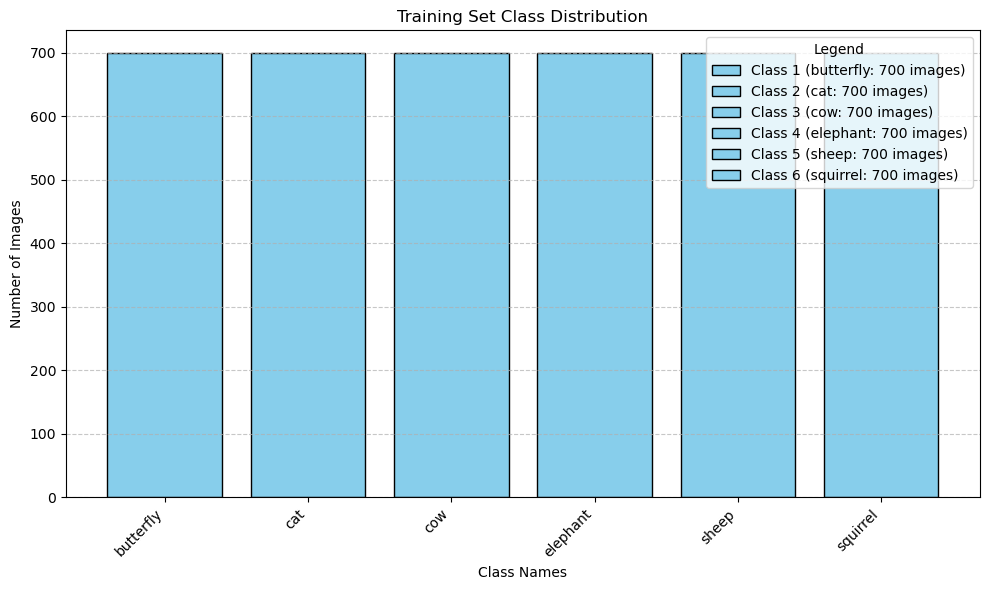

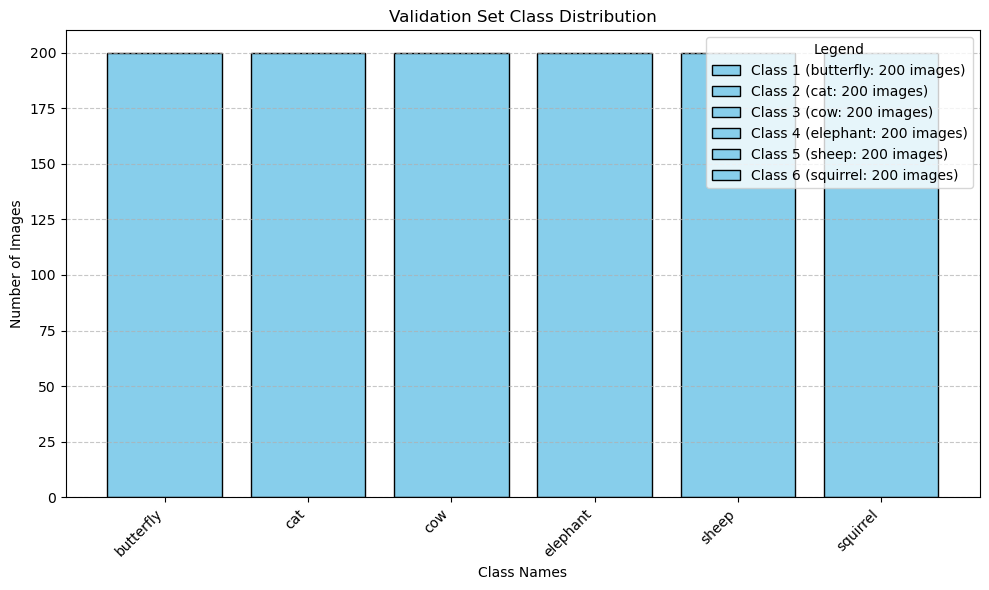

In [15]:
plot_class_distribution(class_names, train_class_counts, "Training Set")
plot_class_distribution(class_names, validation_class_counts, "Validation Set")


In [16]:
print(train_images.shape)
print(train_labels.shape)  # Should be (4200, 6)
print(validation_labels.shape)  # Should be (1200, 6)


(4200, 224, 224, 3)
(4200, 6)
(1200, 6)


In [17]:
# Check statistics of normalized validation images
print("Validation Data Stats (Normalized):")
print(f"Min: {np.min(validation_images_normalized)}")
print(f"Max: {np.max(validation_images_normalized)}")
print(f"Mean: {np.mean(validation_images_normalized)}")
print(f"Std: {np.std(validation_images_normalized)}")

# Check statistics of normalized training images
print("Train Data Stats (Normalized):")
print(f"Min: {np.min(train_images_normalized)}")
print(f"Max: {np.max(train_images_normalized)}")
print(f"Mean: {np.mean(train_images_normalized)}")
print(f"Std: {np.std(train_images_normalized)}")


Validation Data Stats (Normalized):
Min: 0.0
Max: 1.0
Mean: 0.460773566414417
Std: 0.2705787774935138
Train Data Stats (Normalized):
Min: 0.0
Max: 1.0
Mean: 0.4612282186932343
Std: 0.27171892086710714


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(train_images_normalized)

In [ ]:
# trying new model 1

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = models.Sequential()

# Add the first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add the fourth convolutional layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())  # Use GAP instead of Flatten

# Add a fully connected (dense) layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout for regularization

# Add the output layer
model.add(layers.Dense(6, activation='softmax'))

# Compile the model with a tuned learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,  # Increase epochs for better convergence
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
    callbacks=[early_stopping]
)


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,006 (1.62 MB)

 Trainable params: 423,046 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.2996 - loss: 1.6877 - val_accuracy: 0.1667 - val_loss: 1.9579
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.4417 - loss: 1.4257 - val_accuracy: 0.1667 - val_loss: 2.4584
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.4986 - loss: 1.3118 - val_accuracy: 0.2250 - val_loss: 2.1822
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5347 - loss: 1.2340 - val_accuracy: 0.3750 - val_loss: 1.6040
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.5307 - loss: 1.2200 - val_accuracy: 0.5108 - val_loss: 1.3092
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.5709 - loss: 1.1322 - val_accuracy: 0.5000 - val_loss: 1.2800
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.5864 - loss: 1.1118 - val_accuracy: 0.4858 - val_loss: 1.3640
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.6034 - loss: 1.0737 - val_accu

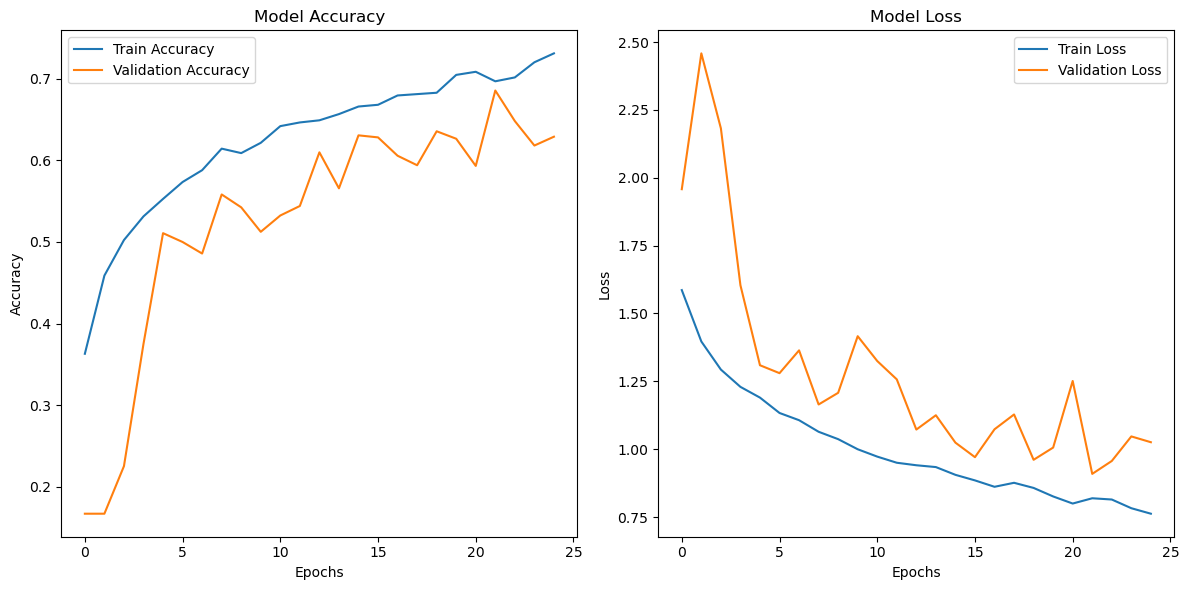

In [65]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
#trying again

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the CNN model
model = models.Sequential()

# Add the first convolutional layer with L2 regularization and BatchNormalization
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Add the fourth convolutional layer
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())  # Use GAP instead of Flatten to reduce overfitting

# Add a fully connected (dense) layer with dropout for regularization
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Add the output layer for multi-class classification
model.add(layers.Dense(6, activation='softmax'))

# Compile the model with a tuned learning rate and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks for better training control
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history = model.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,  # Increased epochs for deeper training with early stopping
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,006 (1.62 MB)

 Trainable params: 423,046 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


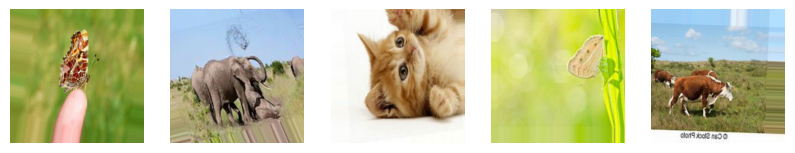

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Sample a few augmented images
augmented_images, _ = next(datagen.flow(train_images_normalized, train_labels, batch_size=5))

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.show()


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = models.Sequential()

# Add the first convolutional layer (32 filters, 3x3 filter size)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after first convolution

# Add the second convolutional layer (64 filters, 3x3 filter size)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after second convolution

# Add the third convolutional layer (128 filters, 3x3 filter size)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after third convolution

# Add the fourth convolutional layer (256 filters, 3x3 filter size)
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Add batch normalization
model.add(layers.MaxPooling2D((2, 2)))  # Pooling layer after fourth convolution

# Add a flattening layer to connect to dense layers
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(128, activation='relu'))

# Add the output layer (with 6 classes)
model.add(layers.Dense(6, activation='softmax'))  # 6 classes for classification

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,109,830 (19.49 MB)

 Trainable params: 5,108,870 (19.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [44]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [48]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [50]:
history = model.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=15,  # Number of epochs, adjust as needed
    batch_size = 32,
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,  # Shuffling the data for each epoch
    callbacks=[early_stopping]  # If using early stopping
)


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 96s 698ms/step - accuracy: 0.2887 - loss: 4.5712 - val_accuracy: 0.1825 - val_loss: 2.2585
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 91s 684ms/step - accuracy: 0.3681 - loss: 1.6138 - val_accuracy: 0.1867 - val_loss: 6.8654
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 96s 723ms/step - accuracy: 0.4514 - loss: 1.4421 - val_accuracy: 0.3008 - val_loss: 2.0016
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 97s 732ms/step - accuracy: 0.5049 - loss: 1.3088 - val_accuracy: 0.4183 - val_loss: 1.8820
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 100s 756ms/step - accuracy: 0.5391 - loss: 1.2561 - val_accuracy: 0.3283 - val_loss: 2.1552
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 93s 704ms/step - accuracy: 0.5607 - loss: 1.1509 - val_accuracy: 0.4950 - val_loss: 1.2866
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 692ms/step - accuracy: 0.5807 - loss: 1.0561 - val_accuracy: 0.5583 - val_loss: 1.2232
Epoch 8/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 91s 687ms/step - accuracy: 0.6004 - loss: 

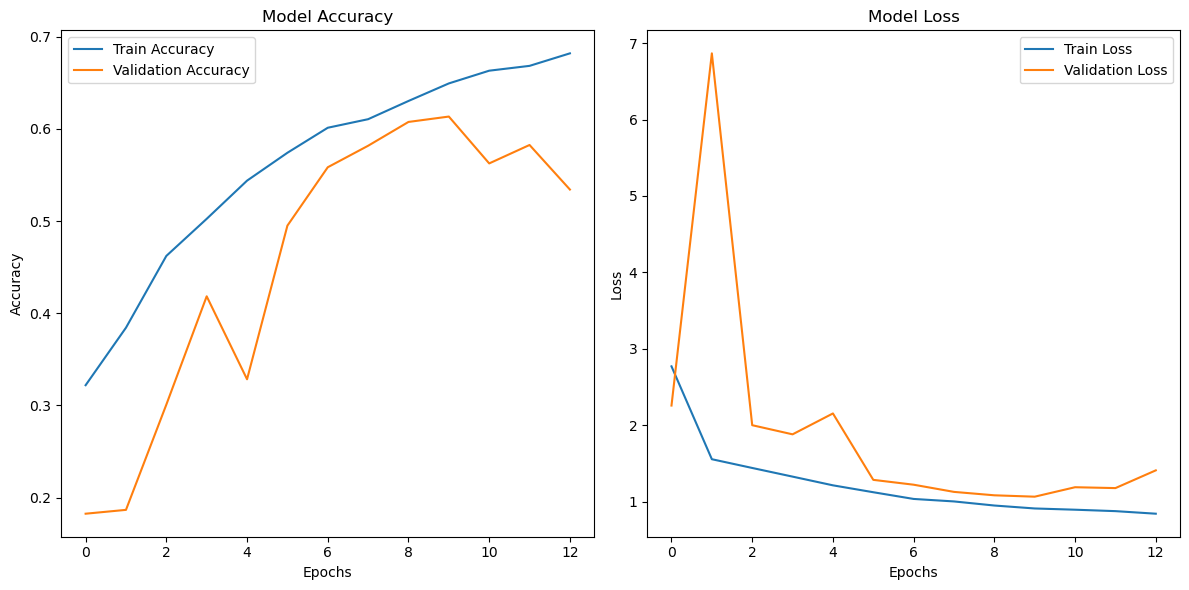

In [52]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [58]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import models, layers

# Define the second CNN model (model 2)
model2 = models.Sequential()

# Add the first convolutional layer
model2.add(layers.Conv2D(16, (3, 3), strides=(1, 1), input_shape=(224, 224, 3)))
model2.add(layers.BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model2.add(layers.Conv2D(32, (3, 3), strides=(1, 1)))
model2.add(layers.BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model2.add(layers.Conv2D(64, (3, 3), strides=(1, 1)))
model2.add(layers.BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))

# Add the fourth convolutional layer
model2.add(layers.Conv2D(128, (3, 3), strides=(1, 1)))
model2.add(layers.BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))

# Add a flattening layer
model2.add(layers.Flatten())

# Add a fully connected (dense) layer
model2.add(layers.Dense(256, activation='relu'))

# Add the output layer
model2.add(layers.Dense(6, activation='softmax'))

# Compile the model with Adam optimizer
model2.compile(optimizer=Adam(learning_rate=0.001),  # Lower learning rate with Adam
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# Fit the model using the datagen.flow with consistent batch size
history = model2.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),  # Consistent batch size here
    epochs=15,  # Number of epochs, adjust as needed
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,  # Shuffling the data for each epoch
)


Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 75s 537ms/step - accuracy: 0.3125 - loss: 5.7232 - val_accuracy: 0.1558 - val_loss: 2.0381
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 69s 520ms/step - accuracy: 0.4559 - loss: 1.4128 - val_accuracy: 0.2292 - val_loss: 1.9949
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 71s 536ms/step - accuracy: 0.4938 - loss: 1.3165 - val_accuracy: 0.3642 - val_loss: 1.7306
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 68s 515ms/step - accuracy: 0.5379 - loss: 1.2140 - val_accuracy: 0.5483 - val_loss: 1.2372
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 73s 553ms/step - accuracy: 0.5369 - loss: 1.2052 - val_accuracy: 0.5450 - val_loss: 1.1611
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 68s 517ms/step - accuracy: 0.5829 - loss: 1.0846 - val_accuracy: 0.6083 - val_loss: 1.1225
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 68s 517ms/step - accuracy: 0.5975 - loss: 1.0672 - val_accuracy: 0.4333 - val_loss: 1.5168
Epoch 8/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 69s 521ms/step - accuracy: 0.6345 - loss: 0

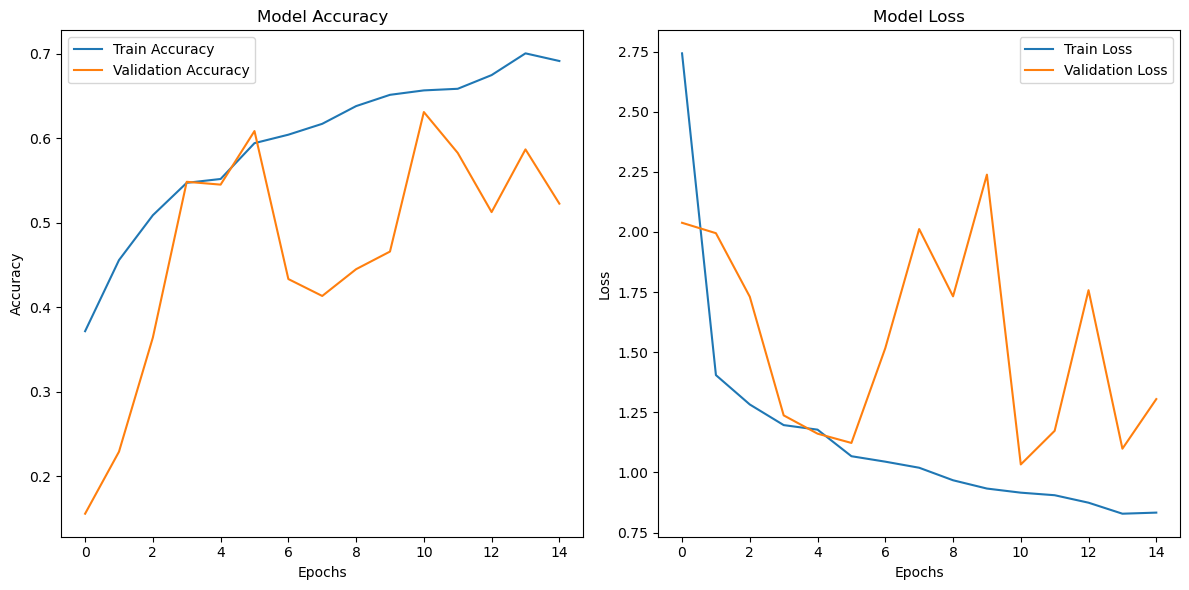

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [74]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Define model3
model3 = models.Sequential()

# First convolutional layer with SELU activation and Batch Normalization
model3.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('selu'))
model3.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with SELU activation and Batch Normalization
model3.add(layers.Conv2D(64, (3, 3), padding='same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('selu'))
model3.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer with SELU activation and Batch Normalization
model3.add(layers.Conv2D(128, (3, 3), padding='same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('selu'))
model3.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional layer with SELU activation and Batch Normalization
model3.add(layers.Conv2D(256, (3, 3), padding='same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('selu'))
model3.add(layers.MaxPooling2D((2, 2)))

# Add Flatten layer
model3.add(layers.Flatten())

# Add a dense layer with dropout to prevent overfitting
model3.add(layers.Dense(512))
model3.add(layers.Activation('selu'))
model3.add(Dropout(0.5))

# Add output layer
model3.add(layers.Dense(6, activation='softmax'))

# Compile the model with a smaller learning rate and Adam optimizer
model3.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# Print the model summary
model3.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,084,038 (99.50 MB)

 Trainable params: 26,083,078 (99.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [76]:
# Compile the model with Adam optimizer and a smaller learning rate
model3.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Fit the model with the training data, validation data, and early stopping callback (if you choose to use it)
history = model3.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=15,  # Number of epochs
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True  # Shuffling the data
)

# Optionally, you can use early stopping if you want to prevent overfitting:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Epoch 1/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 108s 786ms/step - accuracy: 0.3246 - loss: 5.2506 - val_accuracy: 0.1883 - val_loss: 2.7895
Epoch 2/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 106s 803ms/step - accuracy: 0.3584 - loss: 2.7634 - val_accuracy: 0.3000 - val_loss: 1.8552
Epoch 3/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 784ms/step - accuracy: 0.3967 - loss: 2.6534 - val_accuracy: 0.4642 - val_loss: 1.3757
Epoch 4/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 787ms/step - accuracy: 0.3988 - loss: 2.4950 - val_accuracy: 0.5433 - val_loss: 1.3491
Epoch 5/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 787ms/step - accuracy: 0.4328 - loss: 2.3597 - val_accuracy: 0.5342 - val_loss: 1.5440
Epoch 6/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 789ms/step - accuracy: 0.4239 - loss: 2.3828 - val_accuracy: 0.5742 - val_loss: 1.4083
Epoch 7/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 107s 810ms/step - accuracy: 0.4496 - loss: 2.2068 - val_accuracy: 0.5183 - val_loss: 1.6808
Epoch 8/15
132/132 ━━━━━━━━━━━━━━━━━━━━ 104s 789ms/step - accuracy: 0.4498 -

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


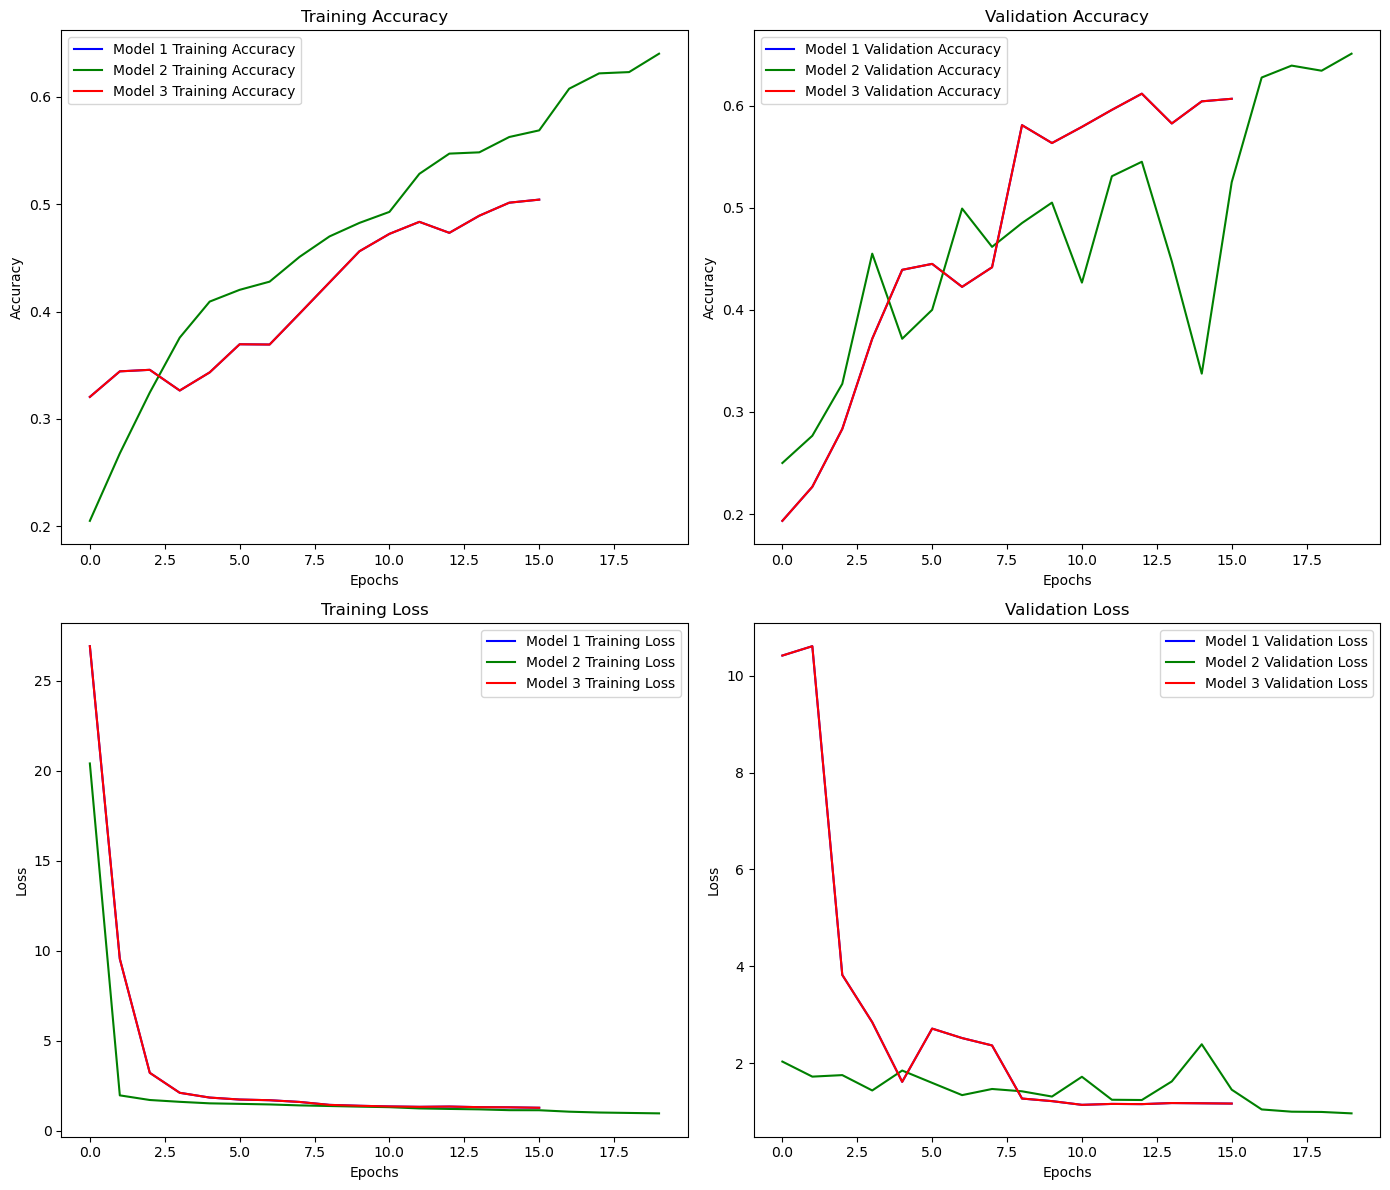

In [285]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots (2 rows and 2 columns)
plt.figure(figsize=(14, 12))

# Plot Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy', color='blue')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy', color='green')
plt.plot(history3.history['accuracy'], label='Model 3 Training Accuracy', color='red')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy', color='blue')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy', color='green')
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Model 1 Training Loss', color='blue')
plt.plot(history2.history['loss'], label='Model 2 Training Loss', color='green')
plt.plot(history3.history['loss'], label='Model 3 Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Validation Loss
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'], label='Model 1 Validation Loss', color='blue')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss', color='green')
plt.plot(history3.history['val_loss'], label='Model 3 Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [353]:
# Check if the training history values are not empty
print("Model 1 training accuracy:", history.history['accuracy'])
print("Model 1 validation accuracy:", history.history['val_accuracy'])
print("Model 1 training loss:", history.history['loss'])
print("Model 1 validation loss:", history.history['val_loss'])


Model 1 training accuracy: [0.3204762041568756, 0.3442857265472412, 0.345714271068573, 0.3264285624027252, 0.34333333373069763, 0.369523823261261, 0.3692857027053833, 0.3980952501296997, 0.427142858505249, 0.45619046688079834, 0.47238096594810486, 0.48357143998146057, 0.47333332896232605, 0.4892857074737549, 0.5014285445213318, 0.5042856931686401]
Model 1 validation accuracy: [0.19333332777023315, 0.2266666740179062, 0.28333333134651184, 0.37166666984558105, 0.4391666650772095, 0.4449999928474426, 0.42250001430511475, 0.4416666626930237, 0.5808333158493042, 0.5633333325386047, 0.5791666507720947, 0.5958333611488342, 0.6116666793823242, 0.5824999809265137, 0.6041666865348816, 0.6066666841506958]
Model 1 training loss: [26.93185043334961, 9.54959487915039, 3.2152457237243652, 2.1049067974090576, 1.839174509048462, 1.7300020456314087, 1.6920632123947144, 1.5962539911270142, 1.4329054355621338, 1.3831498622894287, 1.3468811511993408, 1.3241757154464722, 1.3397468328475952, 1.30592381954193

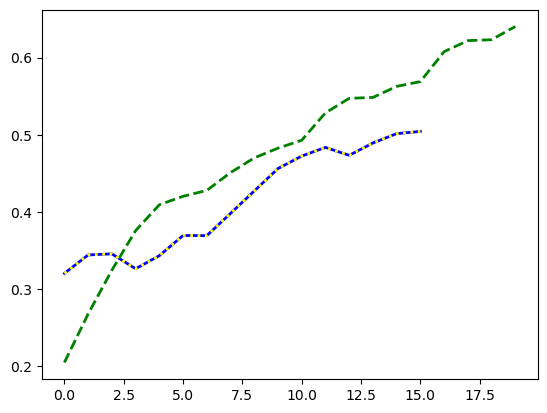